In [23]:
import numpy as np
import pandas as pd 
import os
import json
import random
import glob
import tqdm
import librosa
import librosa.display as display
import IPython.display as ipd
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sc
import numpy as np


import warnings
warnings.filterwarnings('ignore')

In [24]:
fpaths = [os.path.join('../input/coswara-extracted-dataset/cough_outputs',i) for i in os.listdir('../input/coswara-extracted-dataset/cough_outputs')]

In [25]:
with open('../input/coswara-extracted-dataset/cough_outputs/00xKcQMmcAhX8CODgBBLOe7Dm0T2/metadata.json') as f:
    data = json.load(f)
    

In [26]:
data

{'a': 24,
 'covid_status': 'positive_mild',
 'dT': 'web',
 'ep': 'y',
 'fV': 2,
 'ftg': True,
 'g': 'female',
 'l_c': 'India',
 'l_l': 'Kolkata',
 'l_s': 'West Bengal',
 'rU': 'n',
 'test_status': 'p',
 'um': 'n'}

In [27]:
glob.glob('../input/coswara-extracted-dataset/cough_outputs/00xKcQMmcAhX8CODgBBLOe7Dm0T2/*.json')

['../input/coswara-extracted-dataset/cough_outputs/00xKcQMmcAhX8CODgBBLOe7Dm0T2/metadata.json']

In [28]:
fpath = []
labels = []
for i in tqdm.tqdm(fpaths):
    a1 = glob.glob(os.path.join(i,'*.json'))
    a2 = glob.glob(os.path.join(i,'vowel-a.wav'))
    try:
        with open(a1[0]) as f:
            data = json.load(f)
        fpath.append(a2[0])
        labels.append(data['covid_status'])
    except:
        pass

100%|██████████| 897/897 [00:01<00:00, 580.28it/s]


In [29]:
inp = {fil:lab for fil,lab in zip(fpath,labels) if('positive' in lab or 'healthy' in lab)}

In [30]:
X1 = {}
for i in inp:
    if('positive' in inp[i]):
        if('positive' not in X1.keys()):
            X1['positive'] = [i]
        else:
            X1['positive'].append(i)
    else:
        if('negative' not in X1.keys()):
            X1['negative'] = [i]
        else:
            X1['negative'].append(i)

In [31]:
X = random.sample(X1['positive'],200)
y = ['positive' for _ in range(200)]
X.extend(random.sample(X1['negative'],200))
y.extend(['negative' for _ in range(200)])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=69)

In [33]:
# loading audio file with specific sampling rate
s1 , sr = librosa.load(X[y_train.index('positive')], sr=16000)
print(type(s1), type(sr))

s2 , sr = librosa.load(X[y_train.index('negative')], sr=16000)
print(type(s2), type(sr))

<class 'numpy.ndarray'> <class 'int'>
<class 'numpy.ndarray'> <class 'int'>


Text(0.5, 1.0, 'Negative')

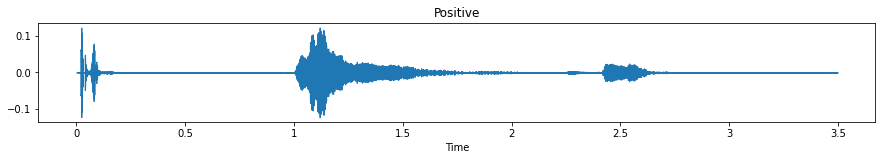

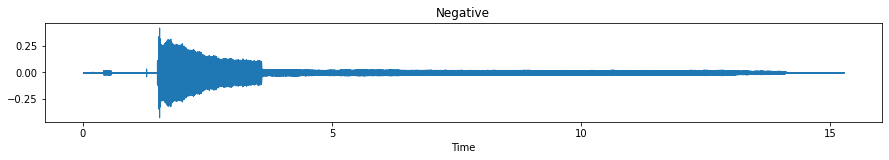

In [34]:
# visualizing audio signals (male & female) in wave (time) domain

plt.figure(figsize=(15,4))
plt.subplot(2, 1, 1)
display.waveshow(s1, sr=sr)
plt.title('Positive')

plt.figure(figsize=(15,4))
plt.subplot(2, 1, 2)
display.waveshow(s2, sr=sr)
plt.title('Negative')

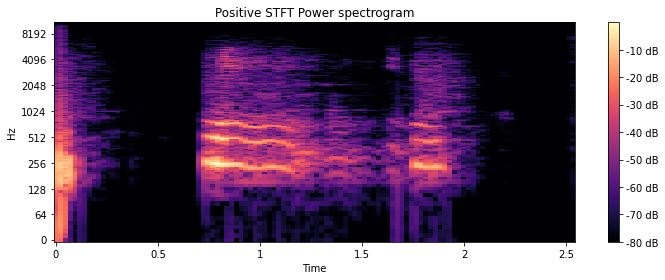

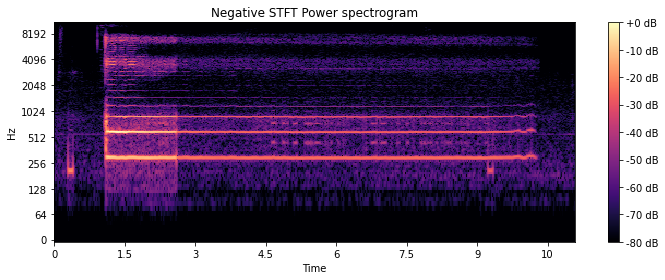

In [35]:
# visualizing the combination of power spectrograms output by STFT w.r.t time

stft_spectrum_matrix = librosa.stft(s1)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_spectrum_matrix), ref=np.max),y_axis='log', x_axis='time')
plt.title('Positive STFT Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

stft_spectrum_matrix = librosa.stft(s2)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_spectrum_matrix), ref=np.max),y_axis='log', x_axis='time')
plt.title('Negative STFT Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

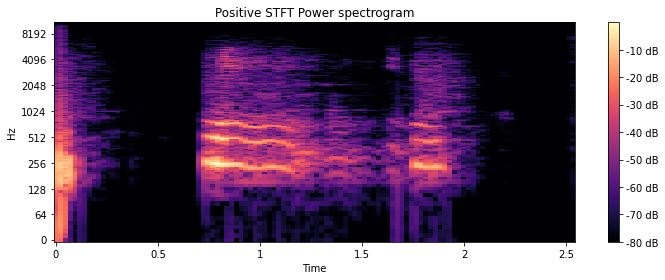

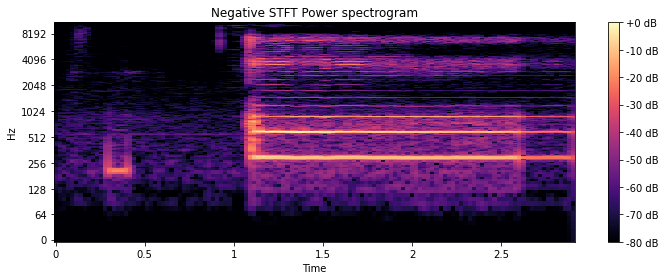

In [36]:
# visualizing the combination of power spectrograms output by STFT w.r.t time

stft_spectrum_matrix = librosa.stft(s1[0:int(4* 16000)])
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_spectrum_matrix), ref=np.max),y_axis='log', x_axis='time')
plt.title('Positive STFT Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

stft_spectrum_matrix = librosa.stft(s2[0:int(4* 16000)])
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_spectrum_matrix), ref=np.max),y_axis='log', x_axis='time')
plt.title('Negative STFT Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

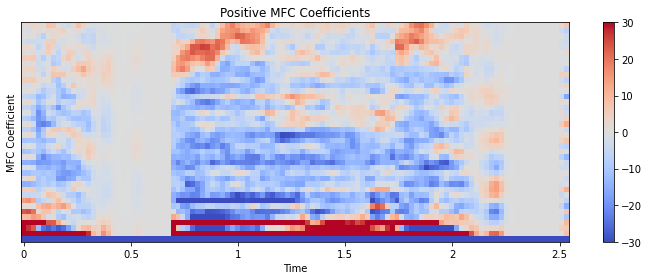

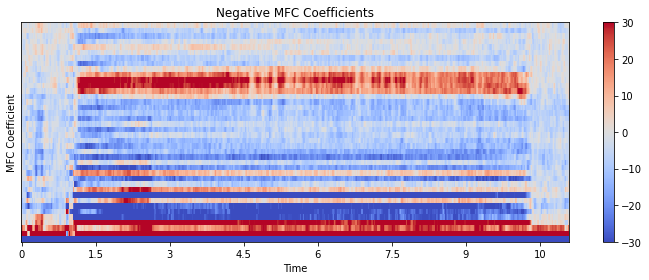

In [37]:
mfc_coefficients = librosa.feature.mfcc(y=s1, sr=sr, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfc_coefficients, x_axis='time',norm=Normalize(vmin=-30,vmax=30))
plt.colorbar()
plt.yticks(())
plt.ylabel('MFC Coefficient')
plt.title('Positive MFC Coefficients')
plt.tight_layout()
                                        
mfc_coefficients = librosa.feature.mfcc(y=s2, sr=sr, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfc_coefficients, x_axis='time',norm=Normalize(vmin=-30,vmax=30))
plt.colorbar()
plt.yticks(())
plt.ylabel('MFC Coefficient')
plt.title('Negative MFC Coefficients')
plt.tight_layout()


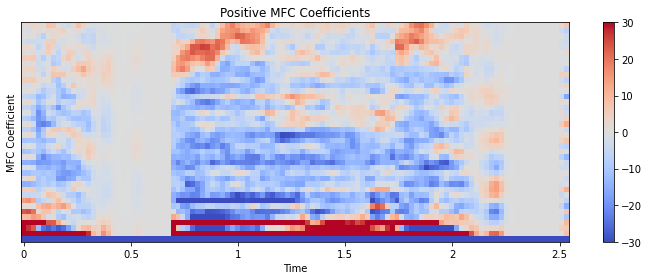

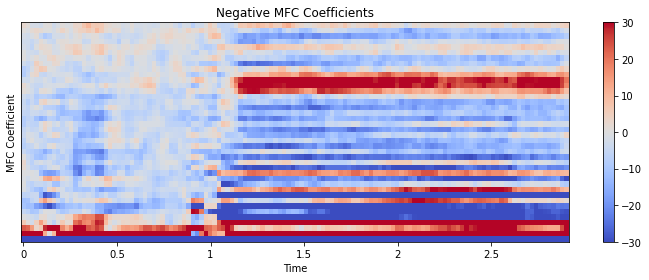

In [38]:
mfc_coefficients = librosa.feature.mfcc(y=s1[0:int(4* 16000)], sr=sr, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfc_coefficients, x_axis='time',norm=Normalize(vmin=-30,vmax=30))
plt.colorbar()
plt.yticks(())
plt.ylabel('MFC Coefficient')
plt.title('Positive MFC Coefficients')
plt.tight_layout()
                                        
mfc_coefficients = librosa.feature.mfcc(y=s2[0:int(4* 16000)], sr=sr, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfc_coefficients, x_axis='time',norm=Normalize(vmin=-30,vmax=30))
plt.colorbar()
plt.yticks(())
plt.ylabel('MFC Coefficient')
plt.title('Negative MFC Coefficients')
plt.tight_layout()

## Feature Extraction

In [39]:
def feature_mfcc(waveform, sample_rate):
    frame_size = 0.025
    frame_stride = 0.01
    pre_emphasis = 0.97
    NFFT = 512
    nfilt = 40
    num_ceps = 12
    
    signal = waveform[0:int(4 * sample_rate)]  # Keep the first 4 seconds
    
    emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])
    
    frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
    signal_length = len(emphasized_signal)
    frame_length = int(round(frame_length))
    frame_step = int(round(frame_step))
    num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

    pad_signal_length = num_frames * frame_step + frame_length
    z = np.zeros((pad_signal_length - signal_length))
    pad_signal = np.append(emphasized_signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

    indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
    frames = pad_signal[indices.astype(np.int32, copy=False)]
    
    frames *= np.hamming(frame_length)
#     frames1 = np.matmul(np.ones((1,mf.shape[0])),mf)[0]
    
    mag_frames = np.absolute(np.fft.rfft(frames, NFFT))  # Magnitude of the FFT
    pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum
    
    low_freq_mel = 0
    high_freq_mel = (2595 * np.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
    mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
    hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
    bin1 = np.floor((NFFT + 1) * hz_points / sample_rate)
    
    fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
    for m in range(1, nfilt + 1):
        f_m_minus = int(bin1[m - 1])   # left
        f_m = int(bin1[m])             # center
        f_m_plus = int(bin1[m + 1])    # right

        for k in range(f_m_minus, f_m):
            fbank[m - 1, k] = (k - bin1[m - 1]) / (bin1[m] - bin1[m - 1])
        for k in range(f_m, f_m_plus):
            fbank[m - 1, k] = (bin1[m + 1] - k) / (bin1[m + 1] - bin1[m])
    filter_banks = np.dot(pow_frames, fbank.T)
    filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Numerical Stability
    filter_banks = 20 * np.log10(filter_banks)  # dB
    
    mfcc = sc.fft.dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] # Keep 2-13
    
#     (nframes, ncoeff) = mfcc.shape
#     n = np.arange(ncoeff)
#     lift = 1 + (cep_lifter / 2) * np.sin(np.pi * n / cep_lifter)
#     mfcc *= lift  #*
    
    filter_banks -= (np.mean(filter_banks, axis=0) + 1e-8)
    mfcc -= (np.mean(mfcc, axis=0) + 1e-8)
    
    return mfcc

In [40]:
def get_features(file):
    # load an individual soundfile
    try:
        waveform , sr = librosa.load(file, sr=16000)
        waveform = waveform[0:int(4 * sr)]
        sample_rate = sr
        # compute features of soundfile
        mfc_coefficients = feature_mfcc(waveform, sample_rate)

        feature_matrix=np.array(mfc_coefficients)
        return feature_matrix
    except:
        pass

In [41]:
def get_feature_matrix(files, labels):
    temp_feats = list()
    temp_labels = list()
    for file, label in tqdm.tqdm(zip(files, labels)):
        features = get_features(file)
        if(not(features is None)):
            temp_feats.append(features)
            temp_labels.append(label)
            
    md = sc.stats.mode([i.shape for i in temp_feats])
    train_feature = []
    train_label = []

    for ctr,i in enumerate(temp_feats):
        if(i.shape == tuple(md[0][0])):
            train_feature.append(i.T[0])
            train_label.append(temp_labels[ctr])

    return np.array(train_feature), np.array(train_label)

In [42]:
train_features, train_labels = get_feature_matrix(X_train, y_train)
test_features, test_labels = get_feature_matrix(X_test, y_test)

280it [02:10,  2.15it/s]
120it [00:53,  2.24it/s]


In [43]:
train_features.shape

(228, 398)

In [44]:
test_features.shape

(95, 398)

## Scaling of features

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [46]:
train_df = pd.DataFrame(train_features)
test_df = pd.DataFrame(test_features)

In [47]:
def get_features_statistics(df):
    # Check MFCC feature values
    features_df_mfcc = df.loc[:,:]
    mfcc_min = features_df_mfcc.min().min()
    mfcc_max = features_df_mfcc.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    mfcc_mean = features_df_mfcc.stack().mean()
    mfcc_stdev = features_df_mfcc.stack().std()
    print(f'\n398 MFCC features:             \
    min = {mfcc_min:.3f},\
    max = {mfcc_max:.3f},\
    mean = {mfcc_mean:.3f},\
    deviation = {mfcc_stdev:.3f}')

In [48]:
get_features_statistics(train_df)


398 MFCC features:                 min = -334.933,    max = 204.545,    mean = -0.000,    deviation = 52.562


In [49]:
get_features_statistics(test_df)


398 MFCC features:                 min = -302.388,    max = 187.341,    mean = -0.000,    deviation = 52.212


In [50]:
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)

scaler = MinMaxScaler()
train_features_minmax = scaler.fit_transform(train_features)


scaler = StandardScaler()
test_features_scaled = scaler.fit_transform(test_features)

scaler = MinMaxScaler()
test_features_minmax = scaler.fit_transform(test_features)


In [51]:
print("Train Standard Scaling:")
print(" ".join(["-"]*15))
train_features_scaled_df = pd.DataFrame(train_features_scaled)
get_features_statistics(train_features_scaled_df)
print("\n\n")

print('Train MinMax Scaling:')
print(" ".join(["-"]*15))
trainfeatures_minmax_df = pd.DataFrame(train_features_minmax)
get_features_statistics(trainfeatures_minmax_df)
print("\n\n")

print("Test Standard Scaling:")
print(" ".join(["-"]*15))
test_features_scaled_df = pd.DataFrame(test_features_scaled)
get_features_statistics(test_features_scaled_df)
print("\n\n")

print('Test MinMax Scaling:')
print(" ".join(["-"]*15))
test_features_minmax_df = pd.DataFrame(test_features_minmax)
get_features_statistics(test_features_minmax_df)

Train Standard Scaling:
- - - - - - - - - - - - - - -

398 MFCC features:                 min = -5.799,    max = 4.736,    mean = -0.000,    deviation = 1.000



Train MinMax Scaling:
- - - - - - - - - - - - - - -

398 MFCC features:                 min = 0.000,    max = 1.000,    mean = 0.550,    deviation = 0.164



Test Standard Scaling:
- - - - - - - - - - - - - - -

398 MFCC features:                 min = -5.554,    max = 4.046,    mean = 0.000,    deviation = 1.000



Test MinMax Scaling:
- - - - - - - - - - - - - - -

398 MFCC features:                 min = 0.000,    max = 1.000,    mean = 0.534,    deviation = 0.193


## Observe Features

In [52]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
encoder = LabelEncoder()
encoder.fit((train_labels.tolist() + test_labels.tolist()))

encoded_train_labels = encoder.transform(train_labels)
encoded_test_labels = encoder.transform(test_labels)

In [54]:
train_df.shape

(228, 398)

In [55]:
train_df[398] = encoded_train_labels

In [56]:
train_df.shape

(228, 399)

In [57]:
corr = train_df.corr()
class_correlation = list(corr[398])
feature_indexes = list(range(399))
sorted_feature_indexes = [x for _,x in sorted(zip(class_correlation, feature_indexes))]
feature_selection = sorted_feature_indexes[:10] + sorted_feature_indexes[389:-1]

In [58]:
corr

,0,1,2,3,4,5,6,7,8,9,...,389,390,391,392,393,394,395,396,397,398
0,1.000000,0.817073,0.679825,0.630545,0.626911,0.635128,0.572784,0.493607,0.457111,0.458282,...,-0.037201,-0.039100,-0.032150,-0.048569,-0.046088,-0.062904,-0.042098,-0.039958,-0.066187,0.068391
1,0.817073,1.000000,0.903078,0.841966,0.807271,0.809369,0.751815,0.661745,0.589855,0.561705,...,-0.095958,-0.089706,-0.092080,-0.118543,-0.124659,-0.139134,-0.122927,-0.100227,-0.127779,0.115764
2,0.679825,0.903078,1.000000,0.911075,0.866534,0.869037,0.803651,0.696302,0.627038,0.584540,...,-0.129225,-0.116630,-0.123754,-0.146981,-0.149648,-0.148994,-0.132641,-0.109764,-0.140120,0.161242
3,0.630545,0.841966,0.911075,1.000000,0.961235,0.930667,0.854952,0.726866,0.650920,0.611424,...,-0.100920,-0.100326,-0.108010,-0.126200,-0.123011,-0.128701,-0.114131,-0.093696,-0.124984,0.132324
4,0.626911,0.807271,0.866534,0.961235,1.000000,0.953700,0.870005,0.737717,0.653292,0.607578,...,-0.100481,-0.096609,-0.105260,-0.124934,-0.118010,-0.125766,-0.104597,-0.084272,-0.112582,0.138546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,-0.062904,-0.139134,-0.148994,-0.128701,-0.125766,-0.175965,-0.192674,-0.142724,-0.122423,-0.094674,...,0.909257,0.921563,0.913262,0.917900,0.964172,1.000000,0.970727,0.931105,0.901108,-0.148464
395,-0.042098,-0.122927,-0.132641,-0.114131,-0.104597,-0.153107,-0.175321,-0.125729,-0.112057,-0.085958,...,0.902868,0.911600,0.910278,0.916042,0.945004,0.970727,1.000000,0.951051,0.924697,-0.153992
396,-0.039958,-0.100227,-0.109764,-0.093696,-0.084272,-0.131310,-0.153413,-0.098259,-0.091820,-0.058299,...,0.839640,0.850907,0.853553,0.857998,0.895365,0.931105,0.951051,1.000000,0.972214,-0.117435
397,-0.066187,-0.127779,-0.140120,-0.124984,-0.112582,-0.162888,-0.181476,-0.119143,-0.110392,-0.084286,...,0.813621,0.825335,0.831378,0.832424,0.868777,0.901108,0.924697,0.972214,1.000000,-0.128291


In [59]:
temp_train_df = train_df[feature_selection]

In [60]:
temp_train_df.shape

(228, 19)

In [61]:
corr = temp_train_df.corr()

<AxesSubplot:>

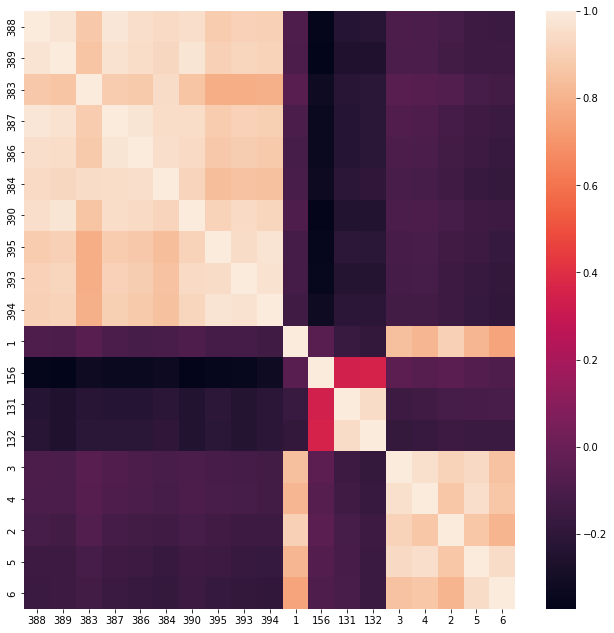

In [62]:
f, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           ax=ax)

In [63]:
train_features_scaled_df[398] = encoded_train_labels
corr = train_features_scaled_df.corr()
class_correlation = list(corr[398])
feature_indexes = list(range(399))
sorted_feature_indexes = [x for _,x in sorted(zip(class_correlation, feature_indexes))]
feature_selection = sorted_feature_indexes[:10] + sorted_feature_indexes[389:-1]

<AxesSubplot:>

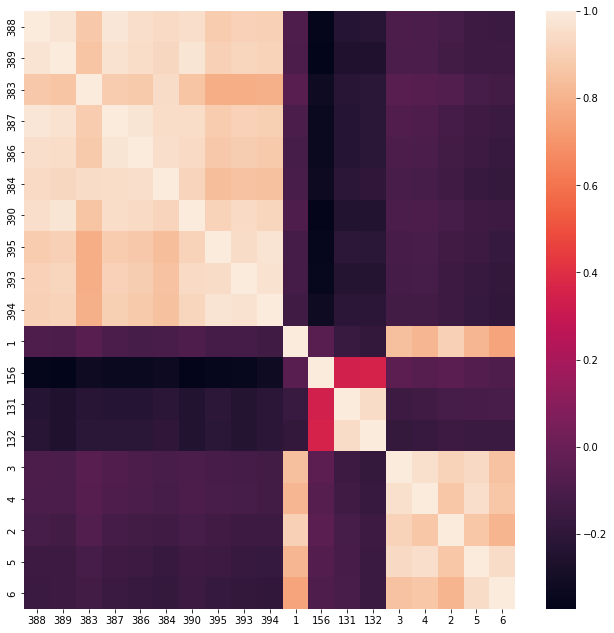

In [64]:
temp_train_df = train_features_scaled_df[feature_selection]
corr = temp_train_df.corr()
f, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           ax=ax)

In [65]:
trainfeatures_minmax_df[398] = encoded_train_labels
corr = trainfeatures_minmax_df.corr()
class_correlation = list(corr[398])
feature_indexes = list(range(399))
sorted_feature_indexes = [x for _,x in sorted(zip(class_correlation, feature_indexes))]
feature_selection = sorted_feature_indexes[:10] + sorted_feature_indexes[389:-1]

<AxesSubplot:>

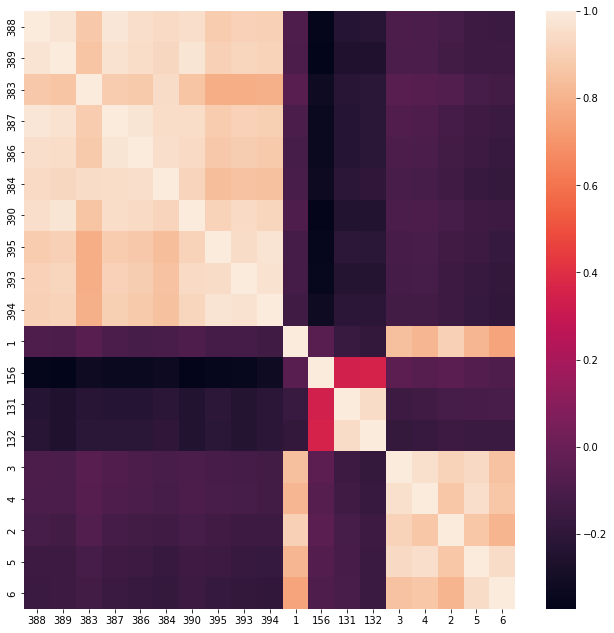

In [66]:
temp_train_df = trainfeatures_minmax_df[feature_selection]
corr = temp_train_df.corr()
f, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           ax=ax)

## TTV

In [67]:
############# Unscaled test/train set #############
X_train, X_test, y_train, y_test = train_test_split(
    train_features, 
    encoded_train_labels, 
    test_size=0.2, 
    random_state=69
)

In [68]:
############ Standard Scaled test/train set ###########
# The labels/classes (y_train, y_test) never change, keep old values 
X_train_scaled, X_test_scaled, _, _ = train_test_split(
    train_features_scaled, 
    encoded_train_labels, 
    test_size=0.2, 
    random_state=69
)

In [69]:
############# MinMax Scaled test/train set ###############
# The labels/classes (y_train, y_test) never change, keep old values 
X_train_minmax, X_test_minmax, _, _ = train_test_split(
    train_features_minmax, 
    encoded_train_labels, 
    test_size=0.2, 
    random_state=69
)

In [70]:
test_features = test_features
test_features_scaled = test_features_scaled
test_features_minmax = test_features_minmax
encoded_test_labels = encoded_test_labels

## Model Selection

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

In [72]:
classification_models = [
    KNeighborsClassifier(),#(3),
    SVC(kernel='linear'),#, C=0.025),
    SVC(kernel='rbf'),
    DecisionTreeClassifier(),#max_depth=5),
    LogisticRegression(),
    RandomForestClassifier()]#max_depth=5, n_estimators=10, max_features=1),

In [73]:
kf = KFold(n_splits=10)

In [74]:
models_saved = []
scores = []
for model in classification_models:
    score_normal_scores = []
    score_scaled_scores = []
    score_minmax_scores = []
    test_normal_scores = []
    test_scaled_scores = []
    test_minmax_scores = []
    for train_index, test_index in kf.split(train_features):
        X_train, X_test = train_features[train_index], train_features[test_index]
        y_train, y_test = encoded_train_labels[train_index], encoded_train_labels[test_index]

        model = model
        model.fit(X_train, y_train)
        score_normal = model.score(X_test, y_test)
        test_normal = model.score(test_features, encoded_test_labels)
        
        X_train_scaled, X_test_scaled = train_features_scaled[train_index], train_features_scaled[test_index]
        y_train, y_test = encoded_train_labels[train_index], encoded_train_labels[test_index]
        model.fit(X_train_scaled, y_train)
        score_scaled = model.score(X_test_scaled, y_test)
        test_scaled = model.score(test_features_scaled, encoded_test_labels)
        
        X_train_minmax, X_test_minmax = train_features_minmax[train_index], train_features_minmax[test_index]
        y_train, y_test = encoded_train_labels[train_index], encoded_train_labels[test_index]
        model.fit(X_train_minmax, y_train)
        score_minmax = model.score(X_test_minmax, y_test)
        test_minmax = model.score(test_features_minmax, encoded_test_labels)
        
        score_normal_scores.append(score_normal)
        score_scaled_scores.append(score_scaled)
        score_minmax_scores.append(score_minmax)
        test_normal_scores.append(test_normal)
        test_scaled_scores.append(test_scaled)
        test_minmax_scores.append(test_minmax)
    
    score_normal = np.mean(score_normal_scores)
    score_scaled = np.mean(score_scaled_scores)
    score_minmax = np.mean(score_minmax_scores)
    test_normal = np.mean(test_normal_scores)
    test_scaled = np.mean(test_scaled_scores)
    test_minmax = np.mean(test_minmax_scores)
    models_saved.append(model)
    model_name = type(model).__name__
    if model_name=='SVC' and model.kernel=='rbf': model_name+=' RBF kernel'
    scores.append((model_name,(f'{100*score_normal:.2f}%'), (f'{100*score_scaled:.2f}%'), (f'{100*score_minmax:.2f}%'),
                  (f'{100*test_normal:.2f}%'), (f'{100*test_scaled:.2f}%'), (f'{100*test_minmax:.2f}%')))
# Make it pretty
scores_df = pd.DataFrame(scores,columns=['Classifier','Accuracy Normal', 'Accuracy Scaled', 'Accuracy MinMax',
                                        "Test Normal", "Test Scaled", "Test MinMax"])


In [75]:
scores_df

,Classifier,Accuracy Normal,Accuracy Scaled,Accuracy MinMax,Test Normal,Test Scaled,Test MinMax
0,KNeighborsClassifier,55.73%,56.17%,56.58%,53.37%,50.42%,53.26%
1,SVC,53.10%,53.08%,55.71%,50.95%,51.47%,56.21%
2,SVC RBF kernel,53.06%,57.45%,55.67%,52.53%,52.32%,58.00%
3,DecisionTreeClassifier,52.13%,52.63%,47.85%,56.63%,54.63%,51.68%
4,LogisticRegression,53.87%,54.37%,54.41%,51.47%,52.53%,57.26%
5,RandomForestClassifier,57.92%,55.69%,51.76%,57.47%,57.37%,54.74%


## Result Observation

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [77]:
model = RandomForestClassifier()

In [78]:
score_minmax = []
test_minmax = []
for train_index, test_index in kf.split(train_features):
    model = model
    
    X_train, X_test = train_features[train_index], train_features[test_index]
    y_train, y_test = encoded_train_labels[train_index], encoded_train_labels[test_index]
    model.fit(X_train, y_train)
    score_minmax.append(model.score(X_test, y_test))
    test_minmax.append(model.score(test_features, encoded_test_labels))
    

In [79]:
test_predictions = model.predict(test_features)
test_groundtruth = encoded_test_labels

In [80]:
conf_matrix = confusion_matrix(test_groundtruth, test_predictions)
conf_matrix_norm = confusion_matrix(test_groundtruth, test_predictions,normalize='true')

In [81]:
np.unique(encoded_test_labels)

array([0, 1])

In [82]:
class_list =["positive", "negative"]
class_name = [cls for cls in class_list]

In [83]:
confmatrix_df = pd.DataFrame(conf_matrix, index=class_name, columns=class_name)
confmatrix_df_norm = pd.DataFrame(conf_matrix_norm, index=class_name, columns=class_name)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}>

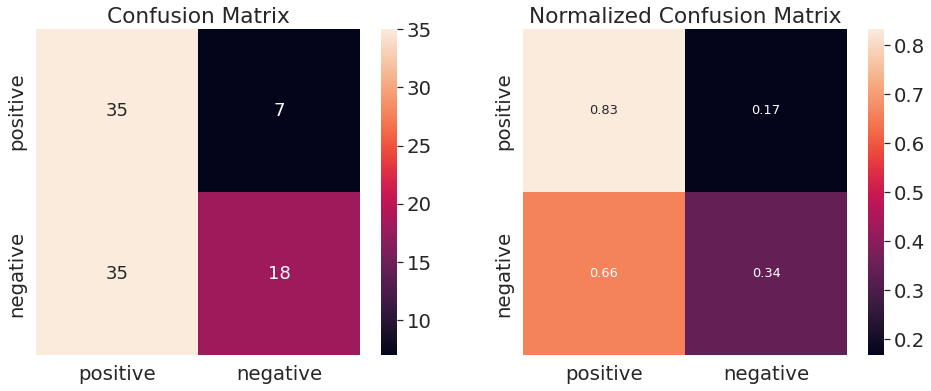

In [84]:
plt.figure(figsize=(16,6))
sn.set(font_scale=1.8) # emotion label and title size
plt.subplot(1,2,1)
plt.title('Confusion Matrix')
sn.heatmap(confmatrix_df, annot=True, annot_kws={"size": 18}) #annot_kws is value font
plt.subplot(1,2,2)
plt.title('Normalized Confusion Matrix')
sn.heatmap(confmatrix_df_norm, annot=True, annot_kws={"size": 13}) #annot_kws is value font

In [85]:
y_pred = model.predict(test_features)
y_test = encoded_test_labels
print(f'Test Set Accuracy score =  {100*accuracy_score(y_test, y_pred):.3f}%') #same as model.score(X_test, y_test)
print(f'Test Set Precision score =  {100*precision_score(y_test, y_pred, average="macro"):.3f}%')
print(f'Test Set Recall score =  {100*recall_score(y_test, y_pred, average="macro"):.3f}%')
print(f'Test Set F-score score =  {100*f1_score(y_test, y_pred, average="macro"):.3}%')

Test Set Accuracy score =  55.789%
Test Set Precision score =  61.000%
Test Set Recall score =  58.648%
Test Set F-score score =  54.3%


## With Selected Features

In [86]:
import time

In [87]:
train_df.shape

(228, 399)

In [88]:
train_features_scaled_df[398] = encoded_train_labels
corr = train_features_scaled_df.corr()
class_correlation = list(corr[398])
feature_indexes = list(range(399))
sorted_feature_indexes = [x for _,x in sorted(zip(class_correlation, feature_indexes))]
feature_selection = sorted_feature_indexes[:10] + sorted_feature_indexes[390:]

In [89]:
feature_selection.remove(398)

In [90]:
len(feature_selection)

18

In [91]:
feature_selection

[388,
 389,
 383,
 387,
 386,
 384,
 390,
 395,
 393,
 394,
 156,
 131,
 132,
 3,
 4,
 2,
 5,
 6]

In [92]:
new_train_df = train_df[feature_selection]
new_test_df = pd.DataFrame(test_features)[feature_selection]

In [93]:
new_train_df.shape

(228, 18)

In [94]:
new_test_df.shape

(95, 18)

In [95]:
new_training_features = new_train_df.to_numpy()
new_test_features = new_test_df.to_numpy()

In [96]:
model = RandomForestClassifier()

In [97]:
for train_index, test_index in kf.split(new_training_features):
    X_train, X_test = new_training_features[train_index], new_training_features[test_index]
    y_train, y_test = encoded_train_labels[train_index], encoded_train_labels[test_index]
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))

0.6086956521739131
0.6086956521739131
0.7391304347826086
0.5217391304347826
0.5217391304347826
0.5652173913043478
0.782608695652174
0.5217391304347826
0.5454545454545454
0.5454545454545454


In [98]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

y_pred = model.predict(new_test_features)
y_test = encoded_test_labels
print(f'Test Set Accuracy score =  {100*accuracy_score(y_test, y_pred):.3f}%') #same as model.score(X_test, y_test)
print(f'Test Set Precision score =  {100*precision_score(y_test, y_pred, average="macro"):.3f}%')
print(f'Test Set Recall score =  {100*recall_score(y_test, y_pred, average="macro"):.3f}%')
print(f'Test Set F-score score =  {100*f1_score(y_test, y_pred, average="macro"):.3}%')

Test Set Accuracy score =  51.579%
Test Set Precision score =  53.690%
Test Set Recall score =  53.392%
Test Set F-score score =  51.1%
